In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### File System Exploration

In [2]:
DATASET_PATH = 'music_dataset/midiclassics/'

In [3]:
TARGET_COMPOSERS = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

In [4]:
filepaths = []
labels = []

In [5]:
for composer in TARGET_COMPOSERS:
    composer_path = os.path.join(DATASET_PATH, composer)
    if os.path.isdir(composer_path):
        print(f"Scanning for MIDI files for: {composer}")
        # os.walk is great for handling nested subdirectories
        for root, dirs, files in os.walk(composer_path):
            for file in files:
                if file.endswith(('.mid', '.midi')):
                    filepaths.append(os.path.join(root, file))
                    labels.append(composer)
    else:
        print(f"Warning: Directory for {composer} not found at {composer_path}")

Scanning for MIDI files for: Bach
Scanning for MIDI files for: Beethoven
Scanning for MIDI files for: Chopin
Scanning for MIDI files for: Mozart


### Dataframe Creation

In [6]:
music_df = pd.DataFrame({
    'filepath': filepaths,
    'composer': labels
})

In [7]:
print(f"\nTotal MIDI files found: {len(music_df)}")


Total MIDI files found: 1530


In [8]:
print(music_df.head())

                                            filepath composer
0  music_dataset/midiclassics/Bach/Bwv0997 Partit...     Bach
1  music_dataset/midiclassics/Bach/Bwv0535 Prelud...     Bach
2  music_dataset/midiclassics/Bach/Bwv0806 Englis...     Bach
3  music_dataset/midiclassics/Bach/Bwv0998 Prelud...     Bach
4  music_dataset/midiclassics/Bach/Jesu Joy of Ma...     Bach


In [9]:
composer_counts = music_df['composer'].value_counts().reset_index()

In [10]:
composer_counts.columns = ['Composer', 'Count']

In [11]:
print(composer_counts)

    Composer  Count
0       Bach    925
1     Mozart    257
2  Beethoven    212
3     Chopin    136


- On initial exploration, we find that the dataset is highly imbalanced. `Bach` has the highest division of the dataset.

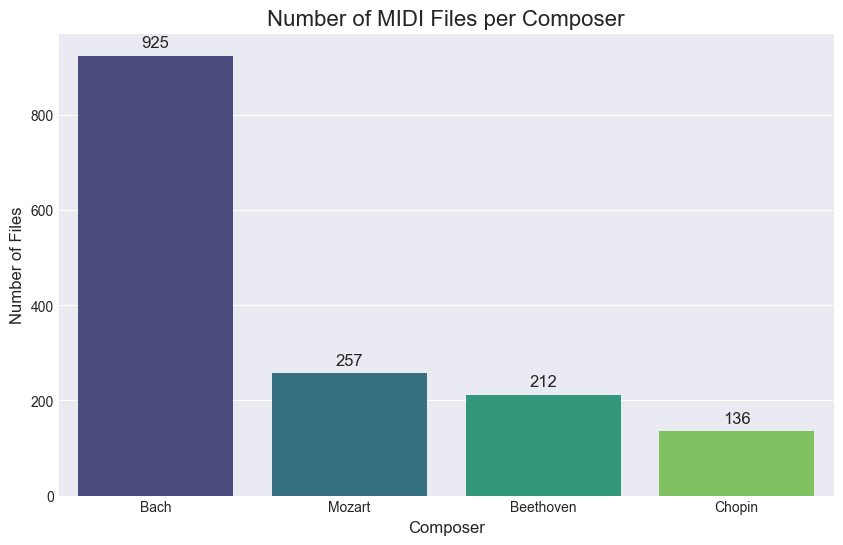

In [12]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Composer', y='Count', data=composer_counts, palette='viridis', hue='Composer')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12)

plt.title('Number of MIDI Files per Composer', fontsize=16)
plt.xlabel('Composer', fontsize=12)
plt.ylabel('Number of Files', fontsize=12)
plt.xticks(rotation=0)
plt.show()

- This confirms that the `Bach` has over `50%` of the dataset split

In [13]:
from music21 import converter, instrument, note, chord, stream

In [14]:
sample_files_df = music_df.drop_duplicates(subset=['composer']).reset_index(drop=True)

### Notes Exploration

In [15]:
for index, row in sample_files_df.iterrows():
    filepath = row['filepath']
    composer = row['composer']

    print(f"\n{'='*40}")
    print(f"Analyzing sample for: {composer}")
    print(f"File: {os.path.basename(filepath)}")
    print(f"{'='*40}")
    score = converter.parse(filepath)
    try:
        key = score.analyze('key')
        print(f"Estimated Key: {key.tonic.name} {key.mode}")
    except Exception as e:
        print(f"Could not determine key: {e}")
    try:
        time_signature = score.getTimeSignatures()[0]
        print(f"Time Signature: {time_signature.ratioString}")
    except Exception as e:
        print(f"Could not determine time signature: {e}")
    print("\nFirst 15 musical elements (Notes/Chords):")
    elements = score.flat.notes
    for i, element in enumerate(elements[:15]):
        if isinstance(element, note.Note):
            print(f"  Element {i+1}: Note - {element.pitch} (Duration: {element.duration.type})")
        elif isinstance(element, chord.Chord):
            chord_pitches = '.'.join(str(p) for p in element.pitches)
            print(f"  Element {i+1}: Chord - {chord_pitches} (Duration: {element.duration.type})")

print(f"\n{'='*40}\n")


Analyzing sample for: Bach
File: Bwv0997 Partita for Lute 1mov.mid
Estimated Key: C minor
Time Signature: 4/4

First 15 musical elements (Notes/Chords):
  Element 1: Note - C3 (Duration: quarter)
  Element 2: Note - C5 (Duration: 16th)
  Element 3: Note - D5 (Duration: 16th)
  Element 4: Note - E-5 (Duration: eighth)
  Element 5: Note - G5 (Duration: eighth)
  Element 6: Note - B5 (Duration: eighth)
  Element 7: Note - C6 (Duration: eighth)
  Element 8: Note - B-2 (Duration: quarter)
  Element 9: Note - C6 (Duration: eighth)
  Element 10: Note - G#2 (Duration: quarter)
  Element 11: Note - C5 (Duration: 16th)
  Element 12: Note - D5 (Duration: 16th)
  Element 13: Note - E-5 (Duration: eighth)
  Element 14: Note - G5 (Duration: eighth)
  Element 15: Note - B5 (Duration: eighth)

Analyzing sample for: Beethoven
File: Hess063 keyb Kaplied.mid


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


Estimated Key: E- major
Time Signature: 4/4

First 15 musical elements (Notes/Chords):
  Element 1: Note - B-4 (Duration: quarter)
  Element 2: Note - E-5 (Duration: quarter)
  Element 3: Note - E-3 (Duration: quarter)
  Element 4: Note - G3 (Duration: quarter)
  Element 5: Note - E-5 (Duration: eighth)
  Element 6: Note - B-4 (Duration: eighth)
  Element 7: Note - B-3 (Duration: quarter)
  Element 8: Note - G#4 (Duration: eighth)
  Element 9: Note - G4 (Duration: eighth)
  Element 10: Note - B-2 (Duration: quarter)
  Element 11: Note - F4 (Duration: eighth)
  Element 12: Note - E-4 (Duration: quarter)
  Element 13: Note - E-3 (Duration: eighth)
  Element 14: Note - G3 (Duration: eighth)
  Element 15: Note - E-4 (Duration: quarter)

Analyzing sample for: Chopin
File: Finale to B Minor Paino Sonata.mid
Estimated Key: B minor
Time Signature: 4/4

First 15 musical elements (Notes/Chords):
  Element 1: Chord - F#3.F#2.F#1.F#4 (Duration: 16th)
  Element 2: Chord - F#2.F#3.F#5.F#4 (Duration:

In [16]:
from tqdm.notebook import tqdm
import numpy as np

In [17]:
SAMPLE_SIZE = None

In [18]:
analysis_df = music_df.head(SAMPLE_SIZE).copy() if SAMPLE_SIZE else music_df.copy()

In [19]:
note_counts = []
chord_counts = []

In [20]:
for index, row in tqdm(analysis_df.iterrows(), total=len(analysis_df)):
    filepath = row['filepath']
    notes = 0
    chords = 0
    
    try:
        score = converter.parse(filepath)
        elements = score.flatten().notes
        
        for element in elements:
            if isinstance(element, note.Note):
                notes += 1
            elif isinstance(element, chord.Chord):
                chords += 1
                
    except Exception as e:
        print(f"Could not process file {os.path.basename(filepath)}. Error: {e}")
        notes = np.nan
        chords = np.nan

    note_counts.append(notes)
    chord_counts.append(chords)

  0%|          | 0/1530 [00:00<?, ?it/s]

/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/music21/midi/translate.py:922: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, data=b'Preludiul nr.3 \xeen re minor, BWV 935'>; getting generic Instrument
  warnings.warn(
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/music21/midi/translate.py:922: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, data=b'Preludiul nr.6 \xeen mi minor, BWV 938'>; getting generic Instrument
  warnings.warn(
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/music21/midi/translate.py:922: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, data=b'J.S.Bach 2\x82\xc2\x82\xcc\x83\x94\x83@\x83C\x83I\x83\x8a\x83\x93\x82\xcc\x82\xbd\x82\xdf\x82\xcc\x

In [21]:
analysis_df['note_count'] = note_counts
analysis_df['chord_count'] = chord_counts
analysis_df['total_events'] = analysis_df['note_count'] + analysis_df['chord_count']

In [22]:
analysis_df['chord_ratio'] = analysis_df['chord_count'] / analysis_df['total_events']
analysis_df['chord_ratio'].fillna(0, inplace=True)

/var/folders/d9/34q0n1js31x765w00t009x6c0000gn/T/ipykernel_47786/300890426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  analysis_df['chord_ratio'].fillna(0, inplace=True)


In [23]:
analysis_df.head()

,filepath,composer,note_count,chord_count,total_events,chord_ratio
0,music_dataset/midiclassics/Bach/Bwv0997 Partit...,Bach,947,12,959,0.012513
1,music_dataset/midiclassics/Bach/Bwv0535 Prelud...,Bach,1996,600,2596,0.231125
2,music_dataset/midiclassics/Bach/Bwv0806 Englis...,Bach,866,94,960,0.097917
3,music_dataset/midiclassics/Bach/Bwv0998 Prelud...,Bach,738,5,743,0.006729
4,music_dataset/midiclassics/Bach/Jesu Joy of Ma...,Bach,2678,16,2694,0.005939


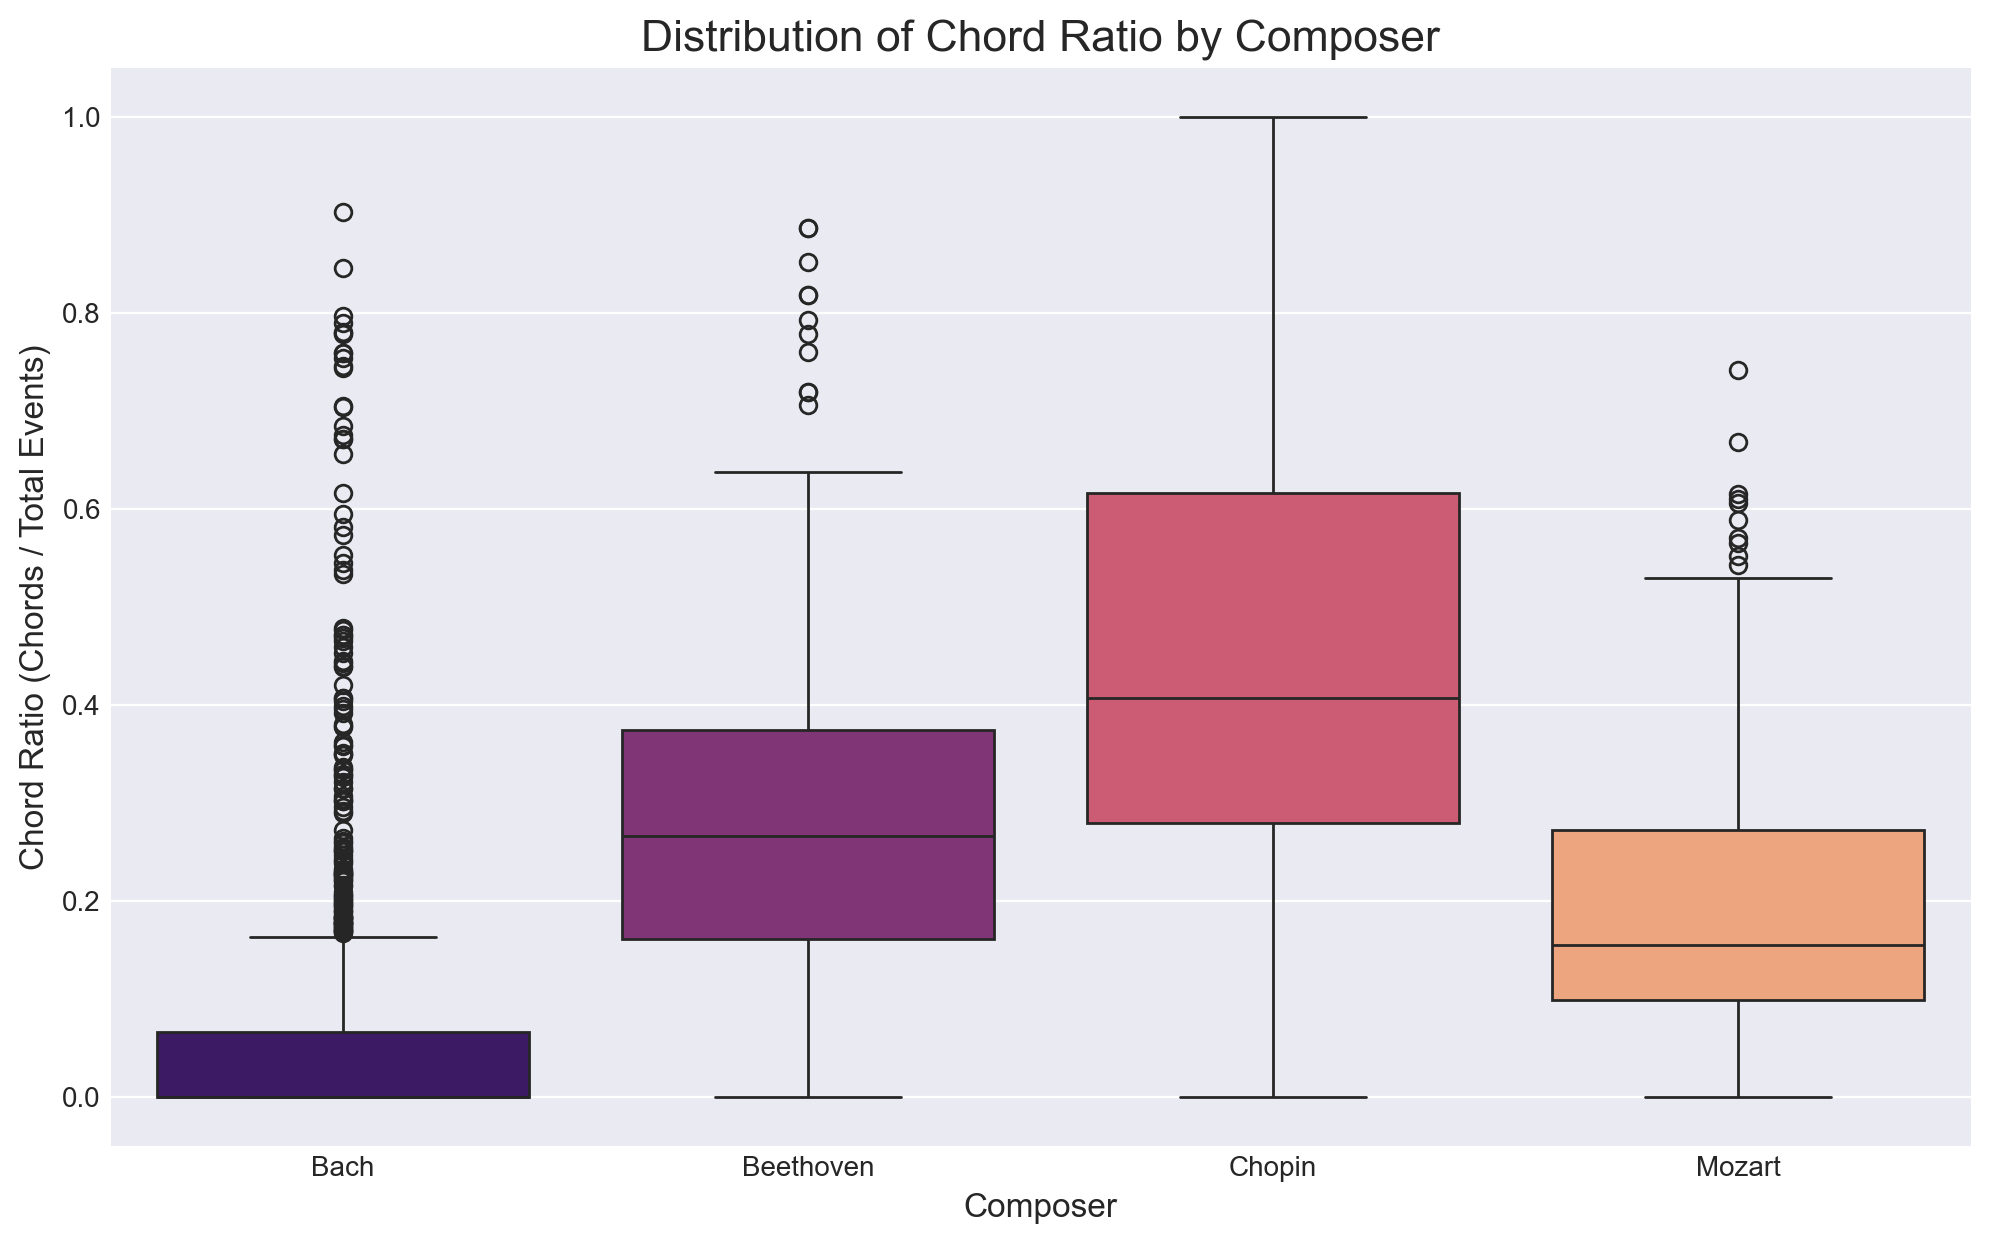

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=analysis_df, x='composer', y='chord_ratio', palette='magma', hue='composer')
plt.title('Distribution of Chord Ratio by Composer', fontsize=16)
plt.xlabel('Composer', fontsize=12)
plt.ylabel('Chord Ratio (Chords / Total Events)', fontsize=12)
plt.show()

- Chopin stands out with the highest median chord ratio, indicating his compositions in this dataset are more chord-heavy.
- Bach has the lowest median chord ratio, suggesting his music here is more contrapuntal, with more individual note lines.
- Beethoven and Mozart fall in between, with Beethoven showing a wider range of chord ratios than Mozart.

In [25]:
from music21 import pitch
import collections


In [26]:
composer_pitches = collections.defaultdict(list)

In [27]:
for index, row in tqdm(analysis_df.iterrows(), total=len(analysis_df)):
    composer = row['composer']
    filepath = row['filepath']
    
    try:
        score = converter.parse(filepath)
        elements = score.flatten().notes
        for element in elements:
            if isinstance(element, note.Note):
                composer_pitches[composer].append(element.pitch.midi)
            elif isinstance(element, chord.Chord):
                for p in element.pitches:
                    composer_pitches[composer].append(p.midi)
    except Exception as e:
        continue

  0%|          | 0/1530 [00:00<?, ?it/s]

/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow enc

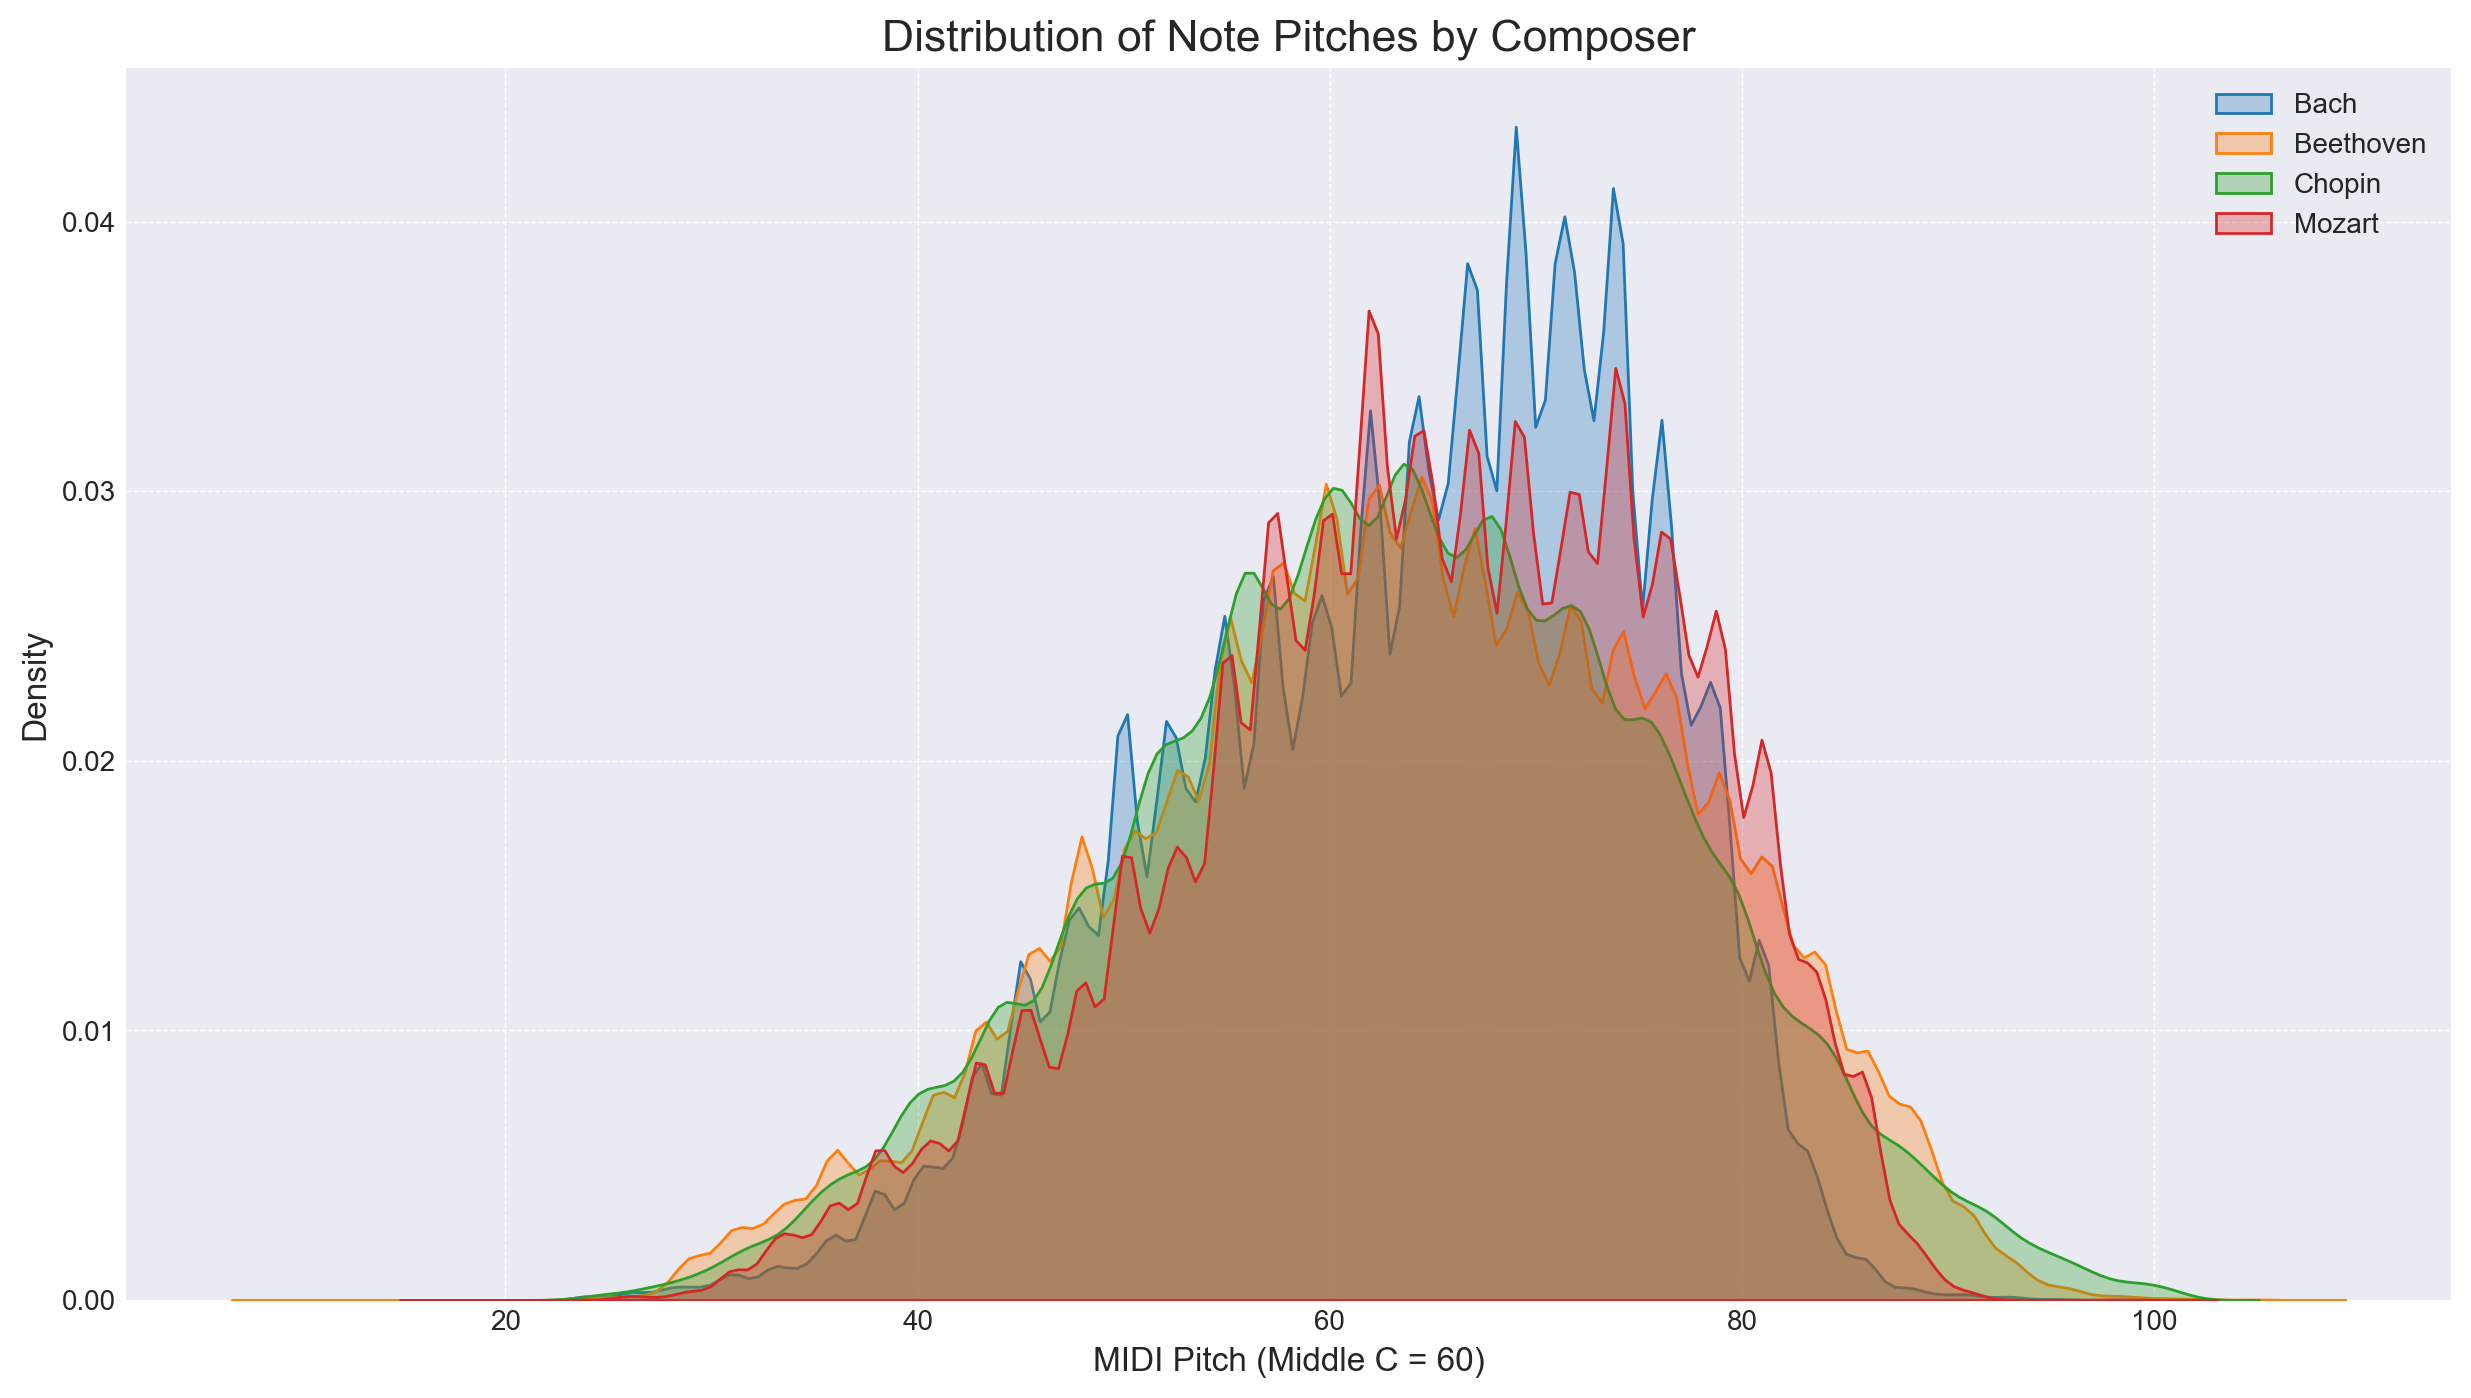

In [28]:
plt.figure(figsize=(15, 8))

# Plot a histogram for each composer's pitches
for composer in TARGET_COMPOSERS:
    sns.kdeplot(composer_pitches[composer], label=composer, fill=True, alpha=0.3)

plt.title('Distribution of Note Pitches by Composer', fontsize=16)
plt.xlabel('MIDI Pitch (Middle C = 60)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show() 

- All composers primarily use pitches in the middle range (around MIDI value 60, which is Middle C).
- Bach's distribution has several sharp peaks, which could correspond to his use of specific keys or modes.
- Chopin's music appears to have a slightly wider pitch range in this dataset.
- Inference: Pitch preference is another subtle but important feature that can help distinguish one composer from another.

In [29]:
event_stats = analysis_df.groupby('composer')['total_events'].describe()
print(event_stats)

           count         mean          std    min      25%     50%      75%  \
composer                                                                      
Bach       925.0  1500.330811  2770.061025   86.0   275.00   522.0  1376.00   
Beethoven  212.0  5925.891509  6678.965605   82.0  1083.75  3563.5  7847.75   
Chopin     136.0  1527.492647  2076.049050   88.0   624.25  1017.0  1581.00   
Mozart     257.0  4517.910506  3550.097026  100.0  1741.00  3560.0  6612.00   

               max  
composer            
Bach       31443.0  
Beethoven  41041.0  
Chopin     17270.0  
Mozart     15520.0  


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow enc

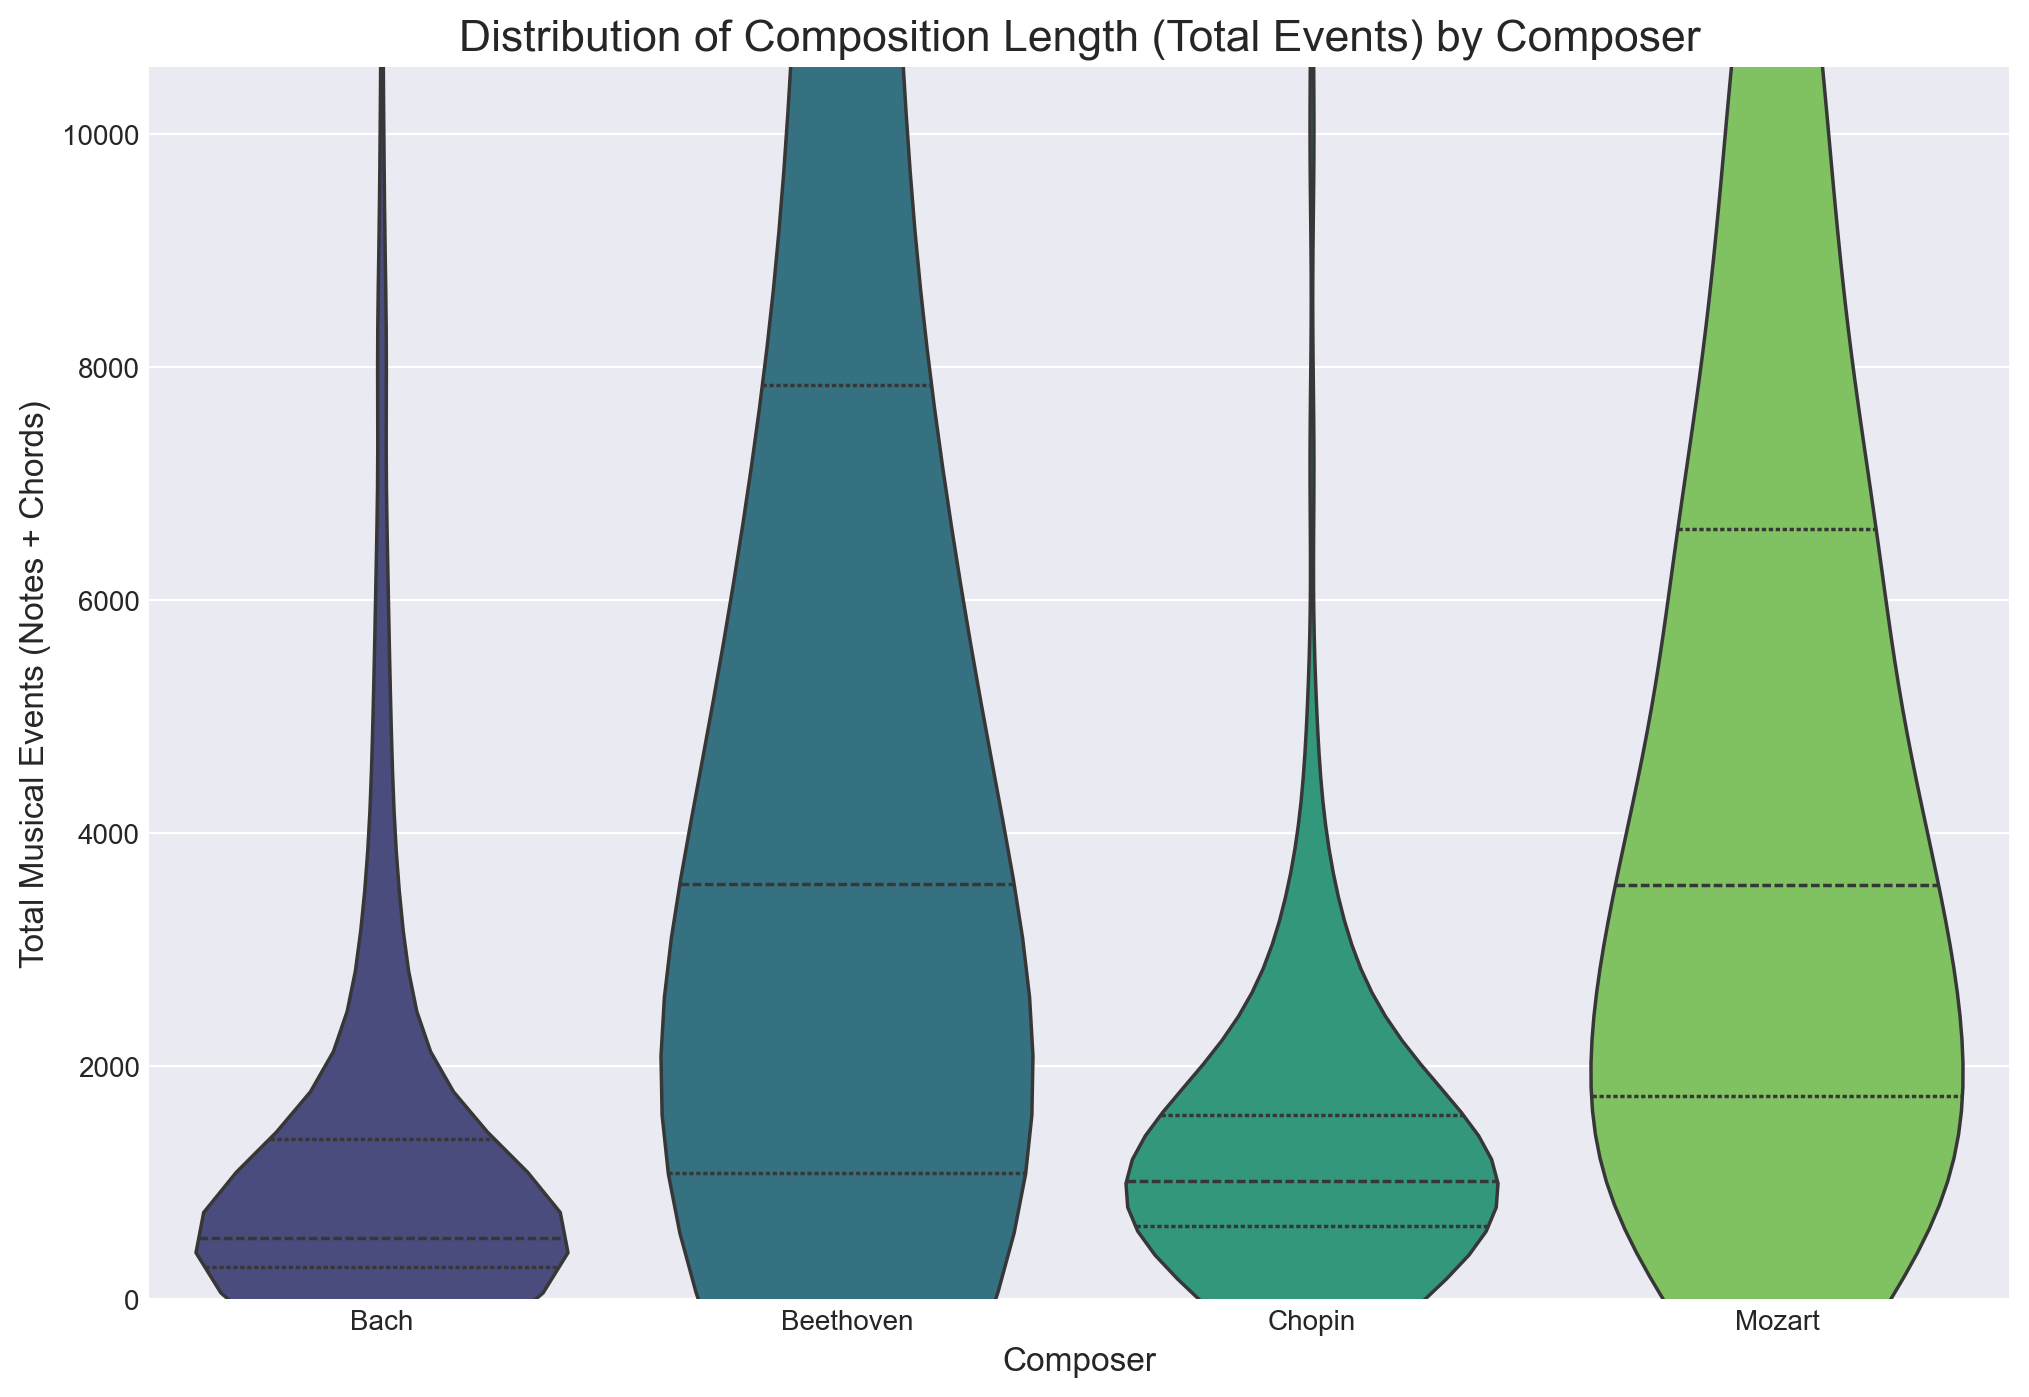

In [30]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=analysis_df, x='composer', y='total_events', palette='viridis', hue='composer', inner='quartile')

plt.title('Distribution of Composition Length (Total Events) by Composer', fontsize=16)
plt.xlabel('Composer', fontsize=12)
plt.ylabel('Total Musical Events (Notes + Chords)', fontsize=12)
plt.ylim(0, analysis_df['total_events'].quantile(0.95))
plt.show()

- Beethoven and Mozart have compositions that are, on average, longer than those of Bach and Chopin in this dataset.
- There are some very long outliers for all composers, which is why you wisely capped the y-axis at the 95th percentile for better visualization.
- Inference: Composition length can also be a stylistic marker, though it might be less reliable than harmonic or melodic features.

# Data Prep - Downsampling - Matching the minimum class

In [31]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from tqdm.notebook import tqdm
import os
import pickle

In [32]:
processed_data_path = 'processed_data'
if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

In [33]:
sequences_file = os.path.join(processed_data_path, 'all_sequences.pkl')
labels_file = os.path.join(processed_data_path, 'all_labels.pkl')
vocab_file = os.path.join(processed_data_path, 'note_to_int.pkl')

In [34]:
min_count = analysis_df['composer'].value_counts().min()
print(f"Balancing dataset: Using {min_count} files per composer.")

Balancing dataset: Using 136 files per composer.


In [35]:
balanced_dfs = [analysis_df[analysis_df['composer'] == c].sample(min_count, random_state=42) for c in TARGET_COMPOSERS]
balanced_df = pd.concat(balanced_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
print("\nBalanced dataset created. Here's the new distribution:")
print(balanced_df['composer'].value_counts())

print("\nTotal files in balanced dataset:", len(balanced_df))


Balanced dataset created. Here's the new distribution:
composer
Mozart       136
Beethoven    136
Chopin       136
Bach         136
Name: count, dtype: int64

Total files in balanced dataset: 544


In [37]:
from music21 import converter, instrument, note, chord
from tqdm.notebook import tqdm
import numpy as np

In [38]:
composer_to_id = {composer: i for i, composer in enumerate(TARGET_COMPOSERS)}
num_composers = len(TARGET_COMPOSERS)
all_sequences = []
all_labels = []
sequence_length = 200

In [39]:
print("Composer to ID Mapping:", composer_to_id)

Composer to ID Mapping: {'Bach': 0, 'Beethoven': 1, 'Chopin': 2, 'Mozart': 3}


### Data processing to train the model

- Uncomment the follwing
- This will parse MIDI files to create labeled sequences
- This will take a while.

In [40]:
# print("\nParsing MIDI files to create labeled sequences...")
# for index, row in tqdm(balanced_df.iterrows(), total=len(balanced_df)):
#     composer_id = composer_to_id[row['composer']]
#     notes_for_file = []

#     try:
#         score = converter.parse(row['filepath'])
#         parts = instrument.partitionByInstrument(score)
#         elements_to_parse = parts.parts[0].recurse() if parts else score.flat.notes

#         for element in elements_to_parse:
#             if isinstance(element, note.Note):
#                 notes_for_file.append(str(element.pitch))
#             elif isinstance(element, chord.Chord):
#                 notes_for_file.append('.'.join(str(n) for n in element.normalOrder))

#         # 🧠 NEW: Skip if not enough musical content
#         if len(notes_for_file) < 100:
#             continue

#         # 🧠 NEW: Use a step size > 1 to reduce near-duplicates
#         step_size = 10
#         for i in range(0, len(notes_for_file) - sequence_length, step_size):
#             sequence = notes_for_file[i : i + sequence_length]
#             all_sequences.append(sequence)
#             all_labels.append(composer_id)

#     except Exception as e:
#         continue


# print(f"\nCreated {len(all_sequences)} sequences of length {sequence_length}.")

- We are creating a unique set of sequences for the model to learn.

In [41]:
# all_notes_flat = [note for seq in all_sequences for note in seq]
# unique_notes = sorted(list(set(all_notes_flat)))
# vocab_size = len(unique_notes)
# note_to_int = {note: number for number, note in enumerate(unique_notes)}

In [42]:
# print(f"Vocabulary Size (unique notes/chords): {vocab_size}")

In [43]:
# network_input = [[note_to_int[note] for note in seq] for seq in all_sequences]
# network_output = all_labels

- Saving the processed data in case we need to reuse it again.

In [44]:
# print(f"\nSaving processed data to '{processed_data_path}' directory...")
# with open(sequences_file, 'wb') as f:
#     pickle.dump(network_input, f)
# with open(labels_file, 'wb') as f:
#     pickle.dump(network_output, f)
# with open(vocab_file, 'wb') as f:
#     pickle.dump(note_to_int, f)
# print("Data saved successfully.")

- Loading the picked file, if it exists, you may skip the processing step

In [ ]:
# with open(sequences_file, 'rb') as f:
#     network_input = pickle.load(f)
# with open(labels_file, 'rb') as f:
#     network_output = pickle.load(f)
# with open(vocab_file, 'rb') as f:
#     note_to_int = pickle.load(f)

In [46]:
n_patterns = len(network_input)
print(f"Total sequences created: {n_patterns}")
all_notes_flat = [note for seq in network_input for note in seq]
unique_notes = sorted(list(set(all_notes_flat)))
vocab_size = len(unique_notes)
print(f"Vocabulary size: {vocab_size}")

Total sequences created: 96390
Vocabulary size: 849


In [47]:
X_tensor = torch.tensor(network_input, dtype=torch.long)
y_tensor = torch.tensor(network_output, dtype=torch.long)

- Checking if we have hardware acceleration

In [48]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("\nPyTorch is using MPS on Apple Silicon. 🎉")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("\nPyTorch is using CUDA. 🎉")
else:
    device = torch.device("cpu")
    print("\nPyTorch is using CPU.")


PyTorch is using MPS on Apple Silicon. 🎉


In [49]:
class MusicClassificationDataset(Dataset):
    def __init__(self, features, labels):
        self.features, self.labels = features, labels
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [50]:
full_dataset = MusicClassificationDataset(X_tensor, y_tensor)

In [51]:
train_size = int(0.9 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

In [52]:
print(f"\nTraining set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")


Training set size: 86751
Validation set size: 9639


In [53]:
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [54]:
class ComposerLSTM(nn.Module):
    def __init__(self, vocab_size, num_composers, embed_size=256, hidden_size=512, num_layers=2, dropout=0.3):
        super(ComposerLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, num_composers)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.dropout(x)
        x = self.fc(x)
        return x

In [55]:
class ComposerCNN(nn.Module):
    def __init__(self, vocab_size, num_composers, embed_size=256, num_filters=256, kernel_sizes=[3, 4, 5], dropout=0.5):
        super(ComposerCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embed_size, out_channels=num_filters, kernel_size=k) for k in kernel_sizes
        ])
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_composers)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)
        conved = [torch.relu(conv(x)) for conv in self.convs]
        pooled = [torch.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        x = self.fc(cat)
        return x

In [56]:
lstm_model = ComposerLSTM(vocab_size, num_composers).to(device)
cnn_model = ComposerCNN(vocab_size, num_composers).to(device)

In [57]:
lstm_model

ComposerLSTM(
  (embedding): Embedding(849, 256)
  (lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=512, out_features=4, bias=True)
)

In [58]:
cnn_model

ComposerCNN(
  (embedding): Embedding(849, 256)
  (convs): ModuleList(
    (0): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
    (1): Conv1d(256, 256, kernel_size=(4,), stride=(1,))
    (2): Conv1d(256, 256, kernel_size=(5,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=768, out_features=4, bias=True)
)

In [59]:
import optuna
from torch.optim import Adam, AdamW, RMSprop

- We are using `Optuna` to find th emost optimal hyper parameters to train the model

- We are using train pruning method to end the trainign iteration if the training isn't going well

In [60]:
def train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, num_epochs, trial=None):
    """
    Trains and evaluates a model, now with Optuna pruning support.
    """
    for epoch in range(num_epochs):
        model.train()
        train_progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", leave=False)
        for inputs, labels in train_progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_progress_bar.set_postfix(loss=loss.item())

        model.eval()
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_predictions += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

        val_accuracy = correct_predictions / total_predictions
        
        if trial:
            trial.report(val_accuracy, epoch)
            if trial.should_prune():
                train_progress_bar.close()
                raise optuna.exceptions.TrialPruned()

        print(f"Epoch {epoch+1}/{num_epochs} | Val Accuracy: {val_accuracy*100:.2f}%")

    return val_accuracy

In [61]:
criterion = nn.CrossEntropyLoss()

In [62]:
def objective_lstm(trial):
    """Optuna objective function for the LSTM model, now passing the trial for pruning."""
    embed_size = trial.suggest_categorical('embed_size', [128, 256])
    hidden_size = trial.suggest_categorical('hidden_size', [256, 512])
    num_layers = trial.suggest_int('num_layers', 1, 2)
    dropout = trial.suggest_float('dropout', 0.2, 0.5)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)

    model = ComposerLSTM(
        vocab_size=vocab_size,
        num_composers=num_composers,
        embed_size=embed_size,
        hidden_size=hidden_size,
        num_layers=num_layers,
        dropout=dropout
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    validation_accuracy = train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, num_epochs=3, trial=trial)
    
    return validation_accuracy

In [ ]:
study_lstm = optuna.create_study(direction='maximize')

[I 2025-08-07 12:48:30,263] A new study created in memory with name: no-name-1d349297-bfa8-4959-b417-78e3d47778e2


In [ ]:
study_lstm.optimize(objective_lstm, n_trials=20)

/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.21557274778868288 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 64.71%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 74.13%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:48:59,302] Trial 0 finished with value: 0.9338174273858921 and parameters: {'embed_size': 128, 'hidden_size': 256, 'num_layers': 1, 'dropout': 0.21557274778868288, 'lr': 0.0008640496430086016}. Best is trial 0 with value: 0.9338174273858921.


Epoch 3/3 | Val Accuracy: 93.38%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 69.34%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 46.60%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:51:50,798] Trial 1 finished with value: 0.6141078838174274 and parameters: {'embed_size': 128, 'hidden_size': 512, 'num_layers': 2, 'dropout': 0.2690825426770423, 'lr': 0.00809140544643003}. Best is trial 0 with value: 0.9338174273858921.


Epoch 3/3 | Val Accuracy: 61.41%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 74.44%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 87.63%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:52:50,796] Trial 2 finished with value: 0.9543568464730291 and parameters: {'embed_size': 128, 'hidden_size': 256, 'num_layers': 2, 'dropout': 0.35951907980167735, 'lr': 0.0011397036672037134}. Best is trial 2 with value: 0.9543568464730291.


Epoch 3/3 | Val Accuracy: 95.44%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 54.21%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 68.53%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:53:47,016] Trial 3 finished with value: 0.7670124481327801 and parameters: {'embed_size': 256, 'hidden_size': 256, 'num_layers': 2, 'dropout': 0.3786713773563584, 'lr': 0.00017702487183823175}. Best is trial 2 with value: 0.9543568464730291.


Epoch 3/3 | Val Accuracy: 76.70%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 40.21%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 54.32%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:55:45,091] Trial 4 finished with value: 0.5047717842323651 and parameters: {'embed_size': 128, 'hidden_size': 512, 'num_layers': 2, 'dropout': 0.46223931554517644, 'lr': 0.006874144522721095}. Best is trial 2 with value: 0.9543568464730291.


Epoch 3/3 | Val Accuracy: 50.48%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.35417695702910706 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:55:54,652] Trial 5 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4430528290401452 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:56:05,134] Trial 6 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2857529815443876 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:56:14,713] Trial 7 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3617127154081873 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 79.27%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 96.68%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:57:12,877] Trial 8 finished with value: 0.9545643153526971 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.3617127154081873, 'lr': 0.0015768835810862623}. Best is trial 8 with value: 0.9545643153526971.


Epoch 3/3 | Val Accuracy: 95.46%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:57:52,763] Trial 9 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.42369517357135555 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 84.79%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 93.80%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:58:51,347] Trial 10 finished with value: 0.9676348547717842 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.42369517357135555, 'lr': 0.002743747047663702}. Best is trial 10 with value: 0.9676348547717842.


Epoch 3/3 | Val Accuracy: 96.76%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4209642431404885 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 85.21%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 95.44%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 12:59:48,456] Trial 11 finished with value: 0.9603734439834025 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.4209642431404885, 'lr': 0.0025319260064662744}. Best is trial 10 with value: 0.9676348547717842.


Epoch 3/3 | Val Accuracy: 96.04%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.49685026038570657 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 88.40%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 95.71%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:00:46,131] Trial 12 finished with value: 0.9549792531120332 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.49685026038570657, 'lr': 0.002920494538505821}. Best is trial 10 with value: 0.9676348547717842.


Epoch 3/3 | Val Accuracy: 95.50%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4262469497832593 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 84.52%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 93.63%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:01:42,117] Trial 13 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4132047026549192 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 85.44%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 94.17%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:02:36,935] Trial 14 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.49759967657164106 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 80.93%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 89.11%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:03:31,272] Trial 15 pruned. 
/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4080745858321729 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 85.60%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 96.80%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:04:25,311] Trial 16 finished with value: 0.970954356846473 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.4080745858321729, 'lr': 0.0018486751530792029}. Best is trial 16 with value: 0.970954356846473.


Epoch 3/3 | Val Accuracy: 97.10%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.325111995950463 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 88.71%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 97.68%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:05:19,645] Trial 17 finished with value: 0.9904564315352697 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.325111995950463, 'lr': 0.0015314462007931847}. Best is trial 17 with value: 0.9904564315352697.


Epoch 3/3 | Val Accuracy: 99.05%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3134727412043879 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 84.52%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 96.70%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:06:13,945] Trial 18 finished with value: 0.9850622406639005 and parameters: {'embed_size': 256, 'hidden_size': 512, 'num_layers': 1, 'dropout': 0.3134727412043879, 'lr': 0.0015231704778698348}. Best is trial 17 with value: 0.9904564315352697.


Epoch 3/3 | Val Accuracy: 98.51%


/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2951053822811877 and num_layers=1
  warnings.warn(


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:06:32,044] Trial 19 pruned. 


In [ ]:
print("Best trial for LSTM:")
trial_lstm = study_lstm.best_trial
print(f"  Value (Validation Accuracy): {trial_lstm.value:.2f}%")
print("  Params: ")
for key, value in trial_lstm.params.items():
    print(f"    {key}: {value}")

Best trial for LSTM:
  Value (Validation Accuracy): 0.99%
  Params: 
    embed_size: 256
    hidden_size: 512
    num_layers: 1
    dropout: 0.325111995950463
    lr: 0.0015314462007931847


In [ ]:
def objective_cnn(trial):
    """Optuna objective function for the CNN model."""
    embed_size = trial.suggest_categorical('embed_size', [128, 256, 300])
    num_filters = trial.suggest_categorical('num_filters', [128, 256])
    dropout = trial.suggest_float('dropout', 0.2, 0.6)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)

    model = ComposerCNN(
        vocab_size=vocab_size,
        num_composers=num_composers,
        embed_size=embed_size,
        num_filters=num_filters,
        kernel_sizes=[3, 4, 5],
        dropout=dropout
    ).to(device)
    model.dropout = nn.Dropout(dropout)


    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    num_epochs_per_trial = 3
    validation_accuracy = train_and_evaluate(model, optimizer, criterion, train_loader, val_loader, num_epochs=num_epochs_per_trial, trial=trial)

    return validation_accuracy

In [ ]:
study_cnn = optuna.create_study(direction='maximize')
study_cnn.optimize(objective_cnn, n_trials=20)

[I 2025-08-07 13:17:49,777] A new study created in memory with name: no-name-fd3e41cf-839a-4ce0-99c3-35d0eca8b4da


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.90%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 100.00%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:18:21,035] Trial 0 finished with value: 0.9993775933609959 and parameters: {'embed_size': 300, 'num_filters': 256, 'dropout': 0.2653643892834977, 'lr': 0.0005743731969749151}. Best is trial 0 with value: 0.9993775933609959.


Epoch 3/3 | Val Accuracy: 99.94%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 87.74%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 96.08%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:18:32,419] Trial 1 finished with value: 0.9852697095435685 and parameters: {'embed_size': 128, 'num_filters': 128, 'dropout': 0.38500848233827967, 'lr': 0.00014312896244475244}. Best is trial 0 with value: 0.9993775933609959.


Epoch 3/3 | Val Accuracy: 98.53%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 98.61%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 99.75%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:18:58,490] Trial 2 finished with value: 0.9979253112033195 and parameters: {'embed_size': 256, 'num_filters': 256, 'dropout': 0.24256624403502733, 'lr': 0.0026279184361175686}. Best is trial 0 with value: 0.9993775933609959.


Epoch 3/3 | Val Accuracy: 99.79%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.77%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 99.44%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:19:18,212] Trial 3 finished with value: 0.9846473029045644 and parameters: {'embed_size': 300, 'num_filters': 128, 'dropout': 0.25200072465856777, 'lr': 0.004096919951521656}. Best is trial 0 with value: 0.9993775933609959.


Epoch 3/3 | Val Accuracy: 98.46%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.94%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 99.05%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:19:37,670] Trial 4 finished with value: 0.9973029045643154 and parameters: {'embed_size': 300, 'num_filters': 128, 'dropout': 0.3321447762897704, 'lr': 0.0022647646923447747}. Best is trial 0 with value: 0.9993775933609959.


Epoch 3/3 | Val Accuracy: 99.73%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:19:48,944] Trial 5 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:19:55,733] Trial 6 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:19:59,643] Trial 7 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:20:06,125] Trial 8 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:20:10,207] Trial 9 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:20:19,678] Trial 10 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.79%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 99.96%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:20:48,353] Trial 11 finished with value: 0.9979253112033195 and parameters: {'embed_size': 256, 'num_filters': 256, 'dropout': 0.2633826138867888, 'lr': 0.0012111831858482454}. Best is trial 0 with value: 0.9993775933609959.


Epoch 3/3 | Val Accuracy: 99.79%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.88%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 100.00%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:21:17,164] Trial 12 finished with value: 1.0 and parameters: {'embed_size': 256, 'num_filters': 256, 'dropout': 0.2387055969244933, 'lr': 0.0005559280089349848}. Best is trial 12 with value: 1.0.


Epoch 3/3 | Val Accuracy: 100.00%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.90%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 100.00%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:21:45,192] Trial 13 finished with value: 1.0 and parameters: {'embed_size': 256, 'num_filters': 256, 'dropout': 0.3076875433672824, 'lr': 0.00043746581914018006}. Best is trial 12 with value: 1.0.


Epoch 3/3 | Val Accuracy: 100.00%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:21:54,464] Trial 14 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.83%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 2/3 | Val Accuracy: 100.00%


Epoch 3/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:22:21,732] Trial 15 finished with value: 1.0 and parameters: {'embed_size': 256, 'num_filters': 256, 'dropout': 0.3794791686821745, 'lr': 0.0004170676095327647}. Best is trial 12 with value: 1.0.


Epoch 3/3 | Val Accuracy: 100.00%


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:22:30,725] Trial 16 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:22:39,693] Trial 17 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:22:48,613] Trial 18 pruned. 


Epoch 1/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

Epoch 1/3 | Val Accuracy: 99.88%


Epoch 2/3 [Training]:   0%|          | 0/677 [00:00<?, ?it/s]

[I 2025-08-07 13:23:06,307] Trial 19 pruned. 


In [ ]:
print("Best trial for CNN:")
trial_cnn = study_cnn.best_trial
print(f"  Value (Validation Accuracy): {trial_cnn.value:.2f}%")
print("  Params: ")
for key, value in trial_cnn.params.items():
    print(f"    {key}: {value}")

Best trial for CNN:
  Value (Validation Accuracy): 1.00%
  Params: 
    embed_size: 256
    num_filters: 256
    dropout: 0.2387055969244933
    lr: 0.0005559280089349848


In [68]:
import copy

In [69]:
def final_train_loop(model, optimizer, criterion, patience, num_epochs, model_path):
    """
    A final training loop with early stopping.
    Saves the best model based on validation loss.
    """
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_wts = copy.deepcopy(model.state_dict())

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", leave=False)
        for inputs, labels in train_progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        val_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_predictions += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct_predictions / total_predictions

        print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {running_loss / len(train_loader):.4f} | "
              f"Val Loss: {avg_val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%")

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), model_path)
            print(f"  -> Validation loss improved. Model saved to {model_path}")
            patience_counter = 0
        else:
            patience_counter += 1
            print(f"  -> Validation loss did not improve. Patience: {patience_counter}/{patience}")

        if patience_counter >= patience:
            print("--- Early stopping triggered. ---")
            break

    model.load_state_dict(best_model_wts)
    return model

In [71]:
# lstm_best_params = study_lstm.best_trial.params

In [72]:
# cnn_best_params = study_cnn.best_trial.params

In [ ]:
# optuna.visualization.plot_slice(study_lstm)

**Since the Model parameters have been observed previously, we would be using the same parameter**

In [73]:
final_lstm_model = ComposerLSTM(
    vocab_size=vocab_size,
    # embed_size=lstm_best_params['embed_size'],
    embed_size=256,
    num_composers=num_composers,
    # hidden_size=lstm_best_params['hidden_size'],
    hidden_size=512,
    # num_layers=lstm_best_params['num_layers'],
    num_layers=1,
    # dropout=lstm_best_params['dropout']
    dropout=0.325111995950463
).to(device)

/Users/chyavanshenoy/Desktop/UniProjectGithub/AAI-511-Project/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.325111995950463 and num_layers=1
  warnings.warn(


In [79]:
final_cnn_model = ComposerCNN(
    vocab_size=vocab_size,
    # embed_size=cnn_best_params['embed_size'],
    embed_size=256,
    num_composers=num_composers,
    # dropout=cnn_best_params['dropout']
    dropout=0.2633826138867888
).to(device)

In [75]:
optimizer = torch.optim.Adam(final_lstm_model.parameters(), lr=0.0015314462007931847)
criterion = nn.CrossEntropyLoss()

In [76]:
final_lstm_model = final_train_loop(
    model=final_lstm_model,
    optimizer=optimizer,
    criterion=criterion,
    patience=5,
    num_epochs=50,
    model_path='best_lstm_model.pth'
)

Epoch 1/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 1/50 | Train Loss: 0.4675 | Val Loss: 0.0650 | Val Accuracy: 98.03%
  -> Validation loss improved. Model saved to best_lstm_model.pth


Epoch 2/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 2/50 | Train Loss: 0.0437 | Val Loss: 0.0306 | Val Accuracy: 99.14%
  -> Validation loss improved. Model saved to best_lstm_model.pth


Epoch 3/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 3/50 | Train Loss: 0.0264 | Val Loss: 0.0107 | Val Accuracy: 99.77%
  -> Validation loss improved. Model saved to best_lstm_model.pth


Epoch 4/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 4/50 | Train Loss: 0.0191 | Val Loss: 0.0228 | Val Accuracy: 99.44%
  -> Validation loss did not improve. Patience: 1/5


Epoch 5/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 5/50 | Train Loss: 0.0242 | Val Loss: 0.0118 | Val Accuracy: 99.72%
  -> Validation loss did not improve. Patience: 2/5


Epoch 6/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 6/50 | Train Loss: 0.0226 | Val Loss: 0.0212 | Val Accuracy: 99.41%
  -> Validation loss did not improve. Patience: 3/5


Epoch 7/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 7/50 | Train Loss: 0.0220 | Val Loss: 0.0072 | Val Accuracy: 99.82%
  -> Validation loss improved. Model saved to best_lstm_model.pth


Epoch 8/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 8/50 | Train Loss: 0.0166 | Val Loss: 0.0137 | Val Accuracy: 99.56%
  -> Validation loss did not improve. Patience: 1/5


Epoch 9/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 9/50 | Train Loss: 0.0166 | Val Loss: 0.0182 | Val Accuracy: 99.56%
  -> Validation loss did not improve. Patience: 2/5


Epoch 10/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 10/50 | Train Loss: 0.0175 | Val Loss: 0.0085 | Val Accuracy: 99.73%
  -> Validation loss did not improve. Patience: 3/5


Epoch 11/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 11/50 | Train Loss: 0.0199 | Val Loss: 0.0119 | Val Accuracy: 99.64%
  -> Validation loss did not improve. Patience: 4/5


Epoch 12/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 12/50 | Train Loss: 0.0142 | Val Loss: 0.0121 | Val Accuracy: 99.70%
  -> Validation loss did not improve. Patience: 5/5
--- Early stopping triggered. ---


In [80]:
optimizer_cnn = torch.optim.Adam(final_cnn_model.parameters(), lr=0.0012111831858482454)
criterion_cnn = nn.CrossEntropyLoss()

In [81]:
final_cnn_model = final_train_loop(
    model=final_cnn_model,
    optimizer=optimizer_cnn,
    criterion=criterion_cnn,
    patience=5,
    num_epochs=50,
    model_path='best_cnn_model.pth'
)

Epoch 1/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 1/50 | Train Loss: 0.1278 | Val Loss: 0.0021 | Val Accuracy: 99.95%
  -> Validation loss improved. Model saved to best_cnn_model.pth


Epoch 2/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 2/50 | Train Loss: 0.0233 | Val Loss: 0.0008 | Val Accuracy: 99.98%
  -> Validation loss improved. Model saved to best_cnn_model.pth


Epoch 3/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 3/50 | Train Loss: 0.0278 | Val Loss: 0.0028 | Val Accuracy: 99.91%
  -> Validation loss did not improve. Patience: 1/5


Epoch 4/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 4/50 | Train Loss: 0.0164 | Val Loss: 0.0015 | Val Accuracy: 99.98%
  -> Validation loss did not improve. Patience: 2/5


Epoch 5/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 5/50 | Train Loss: 0.0203 | Val Loss: 0.0003 | Val Accuracy: 99.99%
  -> Validation loss improved. Model saved to best_cnn_model.pth


Epoch 6/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 6/50 | Train Loss: 0.0160 | Val Loss: 0.0026 | Val Accuracy: 99.92%
  -> Validation loss did not improve. Patience: 1/5


Epoch 7/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 7/50 | Train Loss: 0.0197 | Val Loss: 0.0060 | Val Accuracy: 99.82%
  -> Validation loss did not improve. Patience: 2/5


Epoch 8/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 8/50 | Train Loss: 0.0226 | Val Loss: 0.0011 | Val Accuracy: 99.96%
  -> Validation loss did not improve. Patience: 3/5


Epoch 9/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 9/50 | Train Loss: 0.0195 | Val Loss: 0.0060 | Val Accuracy: 99.85%
  -> Validation loss did not improve. Patience: 4/5


Epoch 10/50 [Training]:   0%|          | 0/1355 [00:00<?, ?it/s]

Epoch 10/50 | Train Loss: 0.0172 | Val Loss: 0.0192 | Val Accuracy: 99.73%
  -> Validation loss did not improve. Patience: 5/5
--- Early stopping triggered. ---


In [82]:
from sklearn.metrics import classification_report

In [83]:
all_preds_lstm = []
all_true_lstm = []

In [84]:
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = final_lstm_model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds_lstm.extend(predicted.cpu().numpy())
        all_true_lstm.extend(labels.cpu().numpy())
print("\nClassification Report:")
print(classification_report(all_true_lstm, all_preds_lstm, target_names=TARGET_COMPOSERS))


Classification Report:
              precision    recall  f1-score   support

        Bach       0.99      1.00      1.00      1001
   Beethoven       1.00      1.00      1.00      4258
      Chopin       1.00      1.00      1.00      1028
      Mozart       1.00      1.00      1.00      3352

    accuracy                           1.00      9639
   macro avg       1.00      1.00      1.00      9639
weighted avg       1.00      1.00      1.00      9639



In [85]:
all_preds_cnn = []
all_true_cnn = []

In [86]:
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = final_cnn_model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_true_cnn.extend(labels.cpu().numpy())
print("\nClassification Report:")
print(classification_report(all_true_cnn, all_preds_cnn, target_names=TARGET_COMPOSERS))


Classification Report:
              precision    recall  f1-score   support

        Bach       1.00      1.00      1.00      1001
   Beethoven       1.00      1.00      1.00      4258
      Chopin       1.00      1.00      1.00      1028
      Mozart       1.00      1.00      1.00      3352

    accuracy                           1.00      9639
   macro avg       1.00      1.00      1.00      9639
weighted avg       1.00      1.00      1.00      9639



In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

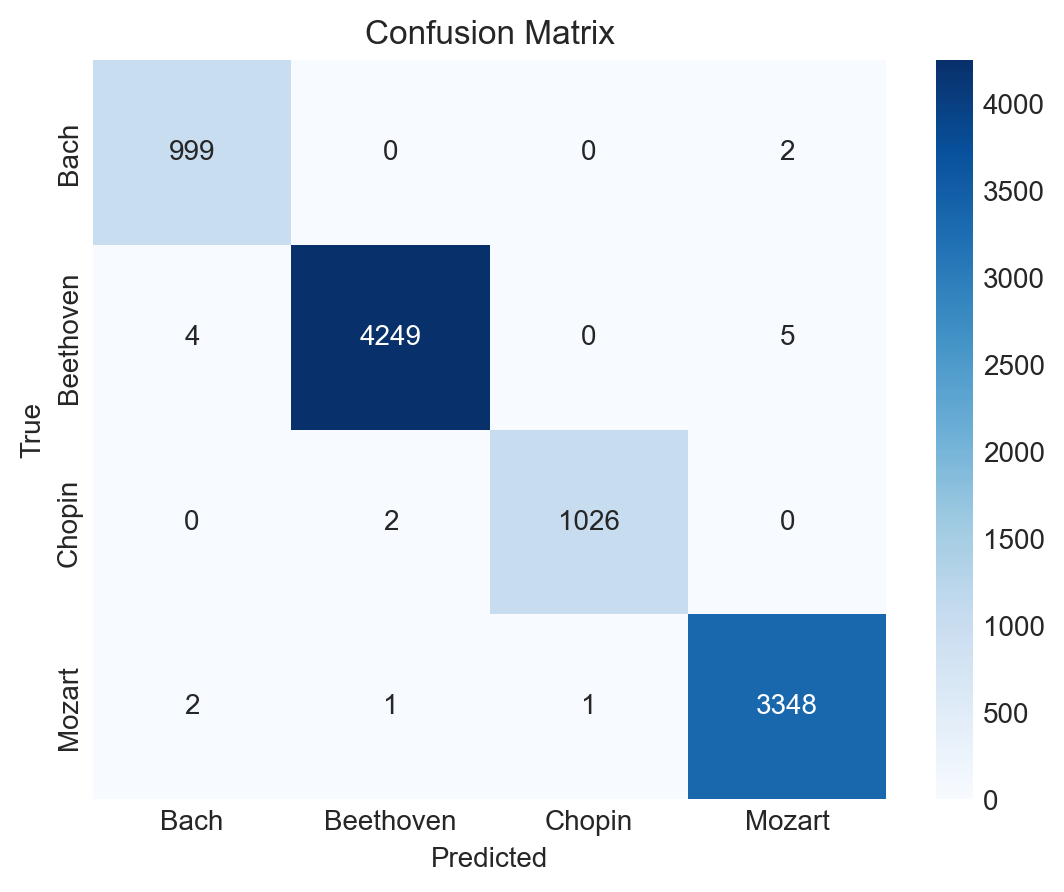

In [88]:
cm = confusion_matrix(all_true_lstm, all_preds_lstm)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=TARGET_COMPOSERS, yticklabels=TARGET_COMPOSERS, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

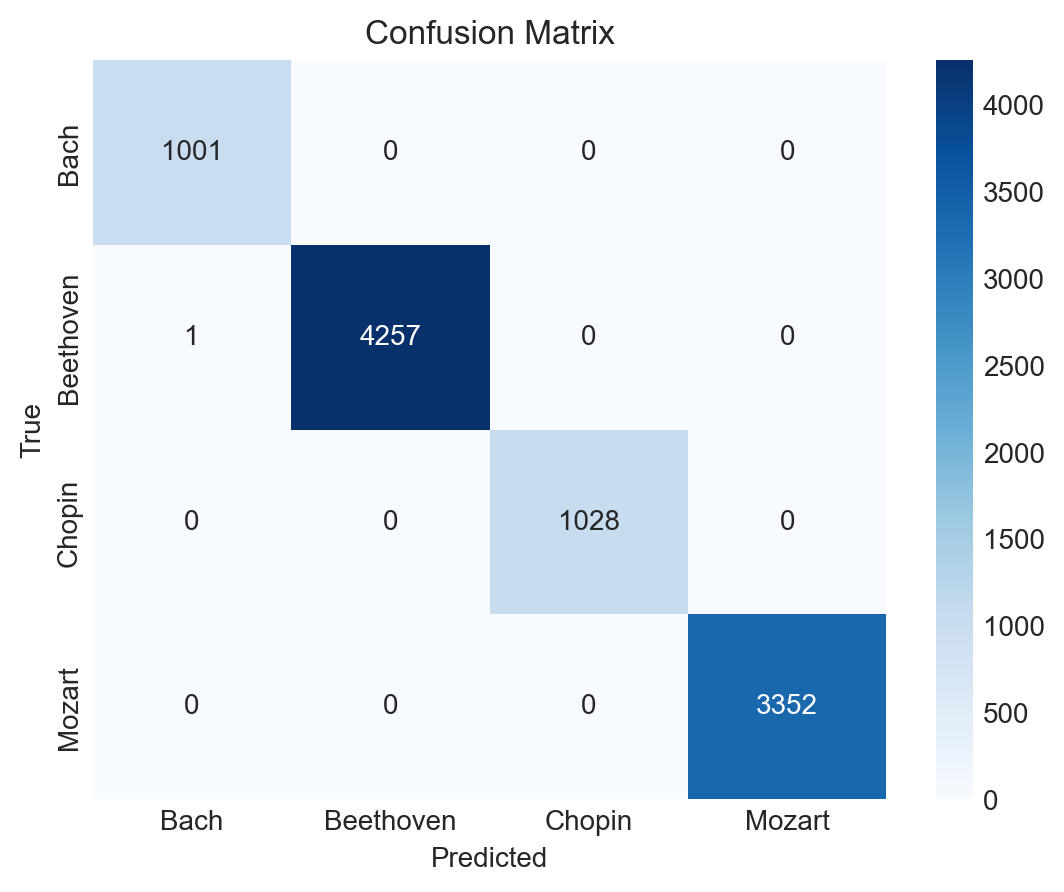

In [89]:
cm = confusion_matrix(all_true_cnn, all_preds_cnn)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=TARGET_COMPOSERS, yticklabels=TARGET_COMPOSERS, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- Hyperparameter Tuning: Optuna helped you find the best hyperparameters for your LSTM model, resulting in a validation accuracy of approximately 99%.
- The model achieved a very high validation accuracy, and the classification report shows near-perfect precision and recall for all composers.  The confusion matrix visually confirms this, with very few misclassifications.

- While CNNs are often associated with image data, they can be very effective for sequence classification by using 1D convolutions to detect patterns (motifs) in the musical sequences
- Optuna found a set of hyperparameters that achieved a remarkable 99% validation accuracy during the tuning phase

**Overall, we see that both models perform sufficiently well**

## Future Enhancements

- Incorporate More Musical Features: Instead of just using pitch, we could create a richer feature set for each musical event.
    - Duration: The length of each note or chord.
    - Rhythm: The time difference between consecutive notes
    - Velocity: How hard a note is played (its loudness).

- Use Data Augmentation: Instead of downsampling, we could use techniques to augment the data for the minority classes. For music, this could involve:
    - Transposition: Shifting the key of a piece up or down.
    - Time Stretching: Speeding up or slowing down a piece without changing the pitch.

- Model Architecture
    - Hybrid CNN-LSTM Model: We could combine the strengths of both architectures. A CNN layer could first extract spatial features (motifs) from the sequences, and the output could then be fed into an LSTM layer to model temporal dependencies.
    - Attention Mechanism: Adding an attention mechanism to our LSTM would allow the model to focus on the most important parts of a musical sequence when making a classification. This can be particularly useful for longer compositions.
    - Transformer-based Models: For a state-of-the-art approach, we could explore music-specific Transformer models, which have shown great success in understanding long-range dependencies in sequences.

### **References**

**Dataset**

Kim, B. (2020). *Classical Music MIDI*. Kaggle. [https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi](https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi)

**Frameworks and Libraries**

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature*, *585*(7825), 357-362.

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering*, *9*(3), 90-95.

McKinney, W. (2010). Data structures for statistical computing in Python. In *Proceedings of the 9th Python in Science Conference* (Vol. 445, pp. 51-56).

Paszke, A., Gross, S., Massa, F., Lerer, A., Bradbury, J., Chanan, G., ... & Chintala, S. (2019). PyTorch: An imperative style, high-performance deep learning library. In *Advances in Neural Information Processing Systems 32* (pp. 8024-8035).

Cuthbert, M. S., & Ariza, C. (2010). music21: A toolkit for computer-aided musicology. In *Proceedings of the International Society for Music Information Retrieval Conference (ISMIR)*.

Akiba, T., Sano, S., Yanase, T., Ohta, T., & Koyama, M. (2019). Optuna: A next-generation hyperparameter optimization framework. In *Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Dubourg, V. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, *12*, 2825-2830.

Waskom, M. L. (2021). seaborn: statistical data visualization. *Journal of Open Source Software*, *6*(60), 3021.

**AI-Assisted Tools**

Google. (2024). *Gemini Language Model*. [https://gemini.google.com/](https://gemini.google.com/)
* *Contribution:* Used to generate explanatory text for the project notebook, provide analysis and inferences of the project's metrics and visualizations, and suggest future enhancements. Additionally, used to review the project against the grading rubric and generate a formal reference list in APA 7 format.